<a href="https://colab.research.google.com/github/rodrfentanes21/Lista3_IA/blob/main/Tenis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install plotly --upgrade

     |████████████████████████████████| 15.2 MB 10.4 MB/s 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
base = pd.read_csv("/content/weather.nominal.csv", ",",encoding =  "ISO8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
base

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [8]:
np.unique(base['play'], return_counts=True)

(array(['no', 'yes'], dtype=object), array([5, 9]))

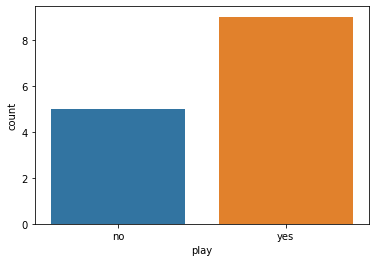

In [9]:
sns.countplot( x = base['play']);

In [10]:
x_prev = base.iloc[:, 0:4].values

In [11]:
x_prev_label = base.iloc[:, 0:4]

In [12]:
x_prev_label

,outlook,temperature,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [13]:
y_classe = base.iloc[:, 4].values

In [14]:
y_classe

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()

In [18]:
label_encoder_humidity = LabelEncoder()
label_encoder_windy = LabelEncoder()

In [19]:
x_prev[:, 2] = label_encoder_humidity.fit_transform(x_prev[:, 2])
x_prev[:, 3] = label_encoder_windy.fit_transform(x_prev[:, 3])

In [20]:
x_prev

array([['sunny', 'hot', 0, 0],
       ['sunny', 'hot', 0, 1],
       ['overcast', 'hot', 0, 0],
       ['rainy', 'mild', 0, 0],
       ['rainy', 'cool', 1, 0],
       ['rainy', 'cool', 1, 1],
       ['overcast', 'cool', 1, 1],
       ['sunny', 'mild', 0, 0],
       ['sunny', 'cool', 1, 0],
       ['rainy', 'mild', 1, 0],
       ['sunny', 'mild', 1, 1],
       ['overcast', 'mild', 0, 1],
       ['overcast', 'hot', 1, 0],
       ['rainy', 'mild', 0, 1]], dtype=object)

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [22]:
onehot_weather = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0, 1])], remainder='passthrough')

In [23]:
x_prev = onehot_weather.fit_transform(x_prev)

In [24]:
x_prev

array([[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0, 0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1, 0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1, 1],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 1]], dtype=object)

In [25]:
x_prev.shape

(14, 8)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
y_classe

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [28]:
y_classe.shape

(14,)

In [29]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_prev, y_classe, test_size = 0.20, random_state = 0)

In [30]:
x_treino.shape

(11, 8)

In [31]:
x_teste.shape

(3, 8)

In [32]:
y_treino

array(['yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes'], dtype=object)

In [33]:
y_teste

array(['yes', 'yes', 'yes'], dtype=object)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
modelo = DecisionTreeClassifier(criterion='entropy')
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy')

In [36]:
previsoes = modelo.predict(x_teste)

In [37]:
previsoes

array(['no', 'yes', 'no'], dtype=object)

In [38]:
y_teste

array(['yes', 'yes', 'yes'], dtype=object)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste, previsoes)

0.3333333333333333

In [40]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[0, 0],
       [2, 1]])

0.3333333333333333

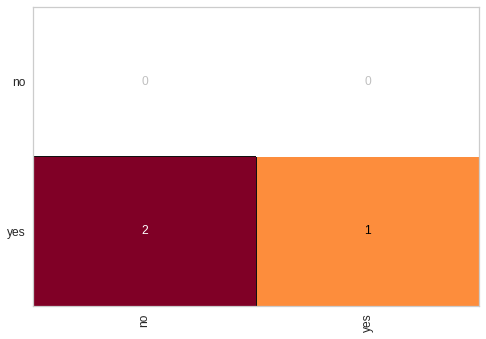

In [41]:
cm = ConfusionMatrix(modelo)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [42]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

          no       0.00      0.00      0.00         0
         yes       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.6, 0.9166666666666666, 'X[0] <= 0.5\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(0.4, 0.75, 'X[5] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.5833333333333334, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.5833333333333334, 'X[6] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4, 0.4166666666666667, 'X[1] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.25, 'X[7] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.75, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

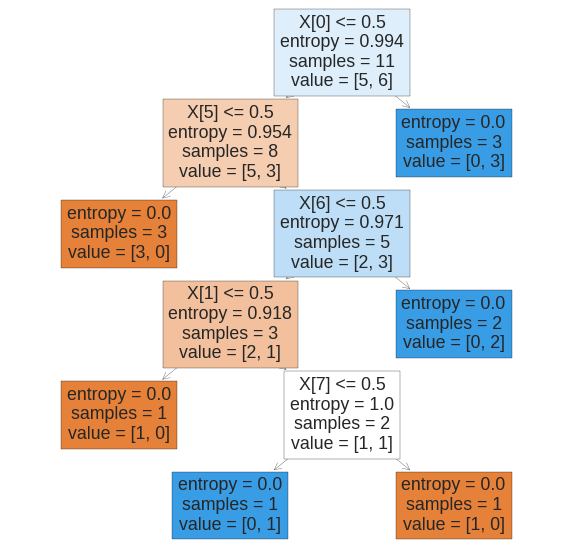

In [43]:
from sklearn import tree
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(modelo, filled=True)